# Análisis Exploratorio de Datos (EDA)
## Proyecto de Minería de Datos

Este notebook contiene el análisis exploratorio de datos del archivo `prueba2.csv`.

### Objetivos:
1. Entender la estructura y características de los datos
2. Identificar patrones, tendencias y anomalías
3. Preparar los datos para modelado posterior
4. Generar insights útiles para la toma de decisiones

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurar el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualización establecida")

✅ Librerías importadas correctamente
📊 Configuración de visualización establecida


## 1. Carga y Exploración Inicial de los Datos

In [2]:
# Cargar el dataset
try:
    df = pd.read_csv('prueba2.csv')
    print("✅ Archivo cargado exitosamente")
    print(f"📋 Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo 'prueba2.csv'")
    print("Por favor, verifica que el archivo esté en el directorio correcto")
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    print("Intentando con diferentes encodings...")
    
    # Intentar con diferentes encodings comunes
    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
    for encoding in encodings:
        try:
            df = pd.read_csv('prueba2.csv', encoding=encoding)
            print(f"✅ Archivo cargado exitosamente con encoding: {encoding}")
            print(f"📋 Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
            break
        except:
            continue
    else:
        print("❌ No se pudo cargar el archivo con ningún encoding común")

✅ Archivo cargado exitosamente
📋 Dimensiones del dataset: 38,248 filas x 27 columnas


In [3]:
# Mostrar las primeras filas del dataset
print("🔍 Primeras 5 filas del dataset:")
print("=" * 50)
display(df.head())

print("\n" + "=" * 50)
print("📊 Información general del dataset:")
print("=" * 50)
df.info()

🔍 Primeras 5 filas del dataset:


,descriptionItem,quantityItem,startDateTender,endDateTender,endDateEnquiry,startDateEnquiry,schemeClassification,idClassification,descriptionClassification,nameProcuringEntity,...,statusCompra,idAward,dateCompra,tags,priceItemCompraPath,quantityItemCompra,descriptionItemCompra,priceItemCompra,idBuyer,nameBuyer
0,Pares de Pilas Alcalinas AA,120.0,2024-05-27T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-27T11:37:00-06:00,UNSPSC,26111702,Pilas alcalinas,Unidad Central,...,complete,MLQqoL-CM-08-AMM-2024-1,2024-05-27T11:38:00.880000-06:00,tender,$['releases'][20]['awards'][0]['items'][0]['un...,6.0,LAMINA ALUZINC 14 PIES,738.9900,yRlaDr,Tribunal Superior de Cuentas (TSC)
1,"COMPR DE 150 LIBRAS DE HARINA, 2 BOTES DE VAIN...",1.0,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,50151513,Aceites de plantas y verduras comestibles,Alcaldía Municipal de Marcovia,...,complete,PLeQ0L-CM-MEP-4394-2024-1,2024-06-12T10:21:28.953000-06:00,tender,$['releases'][55]['awards'][0]['items'][0]['un...,2.0,SIRVASE TRAMITAR LA COMPRA: 2 SMART TV DE 40 P...,5999.0000,DL9pqr,"Municipalidad de Marcovia, Choluteca"
2,BLOQUE N.6,200.0,2024-06-12T10:41:00-06:00,2024-06-13T10:41:00-06:00,2024-06-13T10:41:00-06:00,2024-06-12T10:41:00-06:00,UNSPSC,30131501,Bloques de cemento,Alcaldía Municipal de Marcovia,...,complete,WRz4xL-CM-633-IHSS-HE-2024-1,2024-06-12T10:41:24.763000-06:00,tender,$['releases'][59]['awards'][0]['items'][0]['un...,20.0,SIRVASE TRAMITAR COMPRA: 20 SACOS DE HIELO.\r\...,159.9995,DL9pqr,"Municipalidad de Marcovia, Choluteca"
3,1 LATA GRANDE DE LECHE ENSURE,1.0,2024-06-12T11:29:00-06:00,2024-06-14T10:00:00-06:00,2024-06-14T10:00:00-06:00,2024-06-12T11:29:00-06:00,UNSPSC,73131801,Servicios de elaboración de leche,Unidad Central,...,complete,XRb6JR-CM-11209-PANI-2024-1,2024-06-12T11:30:14.267000-06:00,award,$['releases'][65]['awards'][0]['items'][0]['un...,1.0,80 FCO.- SUCCINILCOLINA (CLORURO) 50MG/ML POLV...,42400.0000,gLkyRb,Ministerio Público (MP)
4,-150 sillas \r\n-6 manteles \r\n-6 mesas \r\n-...,1.0,2024-06-12T11:50:00-06:00,2024-06-13T11:50:00-06:00,2024-06-13T11:50:00-06:00,2024-06-12T11:50:00-06:00,UNSPSC,90111604,Carpas o pabellones,"Estación Local Quimistán, Santa Bárbara",...,complete,1RamMR-053-CBSG-2024-1,2024-06-12T11:50:54.620000-06:00,tender,$['releases'][72]['awards'][0]['items'][0]['un...,1.0,"ADQUISICION DE 158.50GALONES , O 600 LITROS DE...",48300.0000,MLQ77R,Cuerpo de Bomberos de Honduras (CBH)



📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38248 entries, 0 to 38247
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   descriptionItem            38048 non-null  object 
 1   quantityItem               33550 non-null  float64
 2   startDateTender            38248 non-null  object 
 3   endDateTender              38248 non-null  object 
 4   endDateEnquiry             38248 non-null  object 
 5   startDateEnquiry           38248 non-null  object 
 6   schemeClassification       38248 non-null  object 
 7   idClassification           38248 non-null  int64  
 8   descriptionClassification  38248 non-null  object 
 9   nameProcuringEntity        38248 non-null  object 
 10  unitItem                   38248 non-null  object 
 11  idUnidadBuyer              38248 non-null  object 
 12  nameUnidadBuyer            38248 non-null  object 
 13  idSupplier

In [4]:
# Estadísticas descriptivas básicas
print("📈 Estadísticas descriptivas de variables numéricas:")
print("=" * 60)
display(df.describe())

print("\n📋 Nombres de las columnas:")
print("=" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🔢 Tipos de datos:")
print("=" * 20)
print(df.dtypes.value_counts())

📈 Estadísticas descriptivas de variables numéricas:


,quantityItem,idClassification,quantityItemCompra,priceItemCompra
count,33550.000000,3.824800e+04,31471.000000,3.153300e+04
mean,166.060338,4.984187e+07,116.236764,4.284525e+04
std,3530.697992,2.165426e+07,3061.850219,1.428025e+05
min,0.001000,5.010150e+05,0.100000,0.000000e+00
25%,1.000000,3.121170e+07,1.000000,7.914300e+02
50%,1.000000,4.617150e+07,1.000000,8.250000e+03
75%,3.000000,7.014170e+07,2.000000,3.726000e+04
max,322580.000000,9.810163e+07,322580.000000,1.333674e+07



📋 Nombres de las columnas:
 1. descriptionItem
 2. quantityItem
 3. startDateTender
 4. endDateTender
 5. endDateEnquiry
 6. startDateEnquiry
 7. schemeClassification
 8. idClassification
 9. descriptionClassification
10. nameProcuringEntity
11. unitItem
12. idUnidadBuyer
13. nameUnidadBuyer
14. idSupplier
15. nameSupplier
16. ocidCompra
17. idCompra
18. statusCompra
19. idAward
20. dateCompra
21. tags
22. priceItemCompraPath
23. quantityItemCompra
24. descriptionItemCompra
25. priceItemCompra
26. idBuyer
27. nameBuyer

🔢 Tipos de datos:
object     23
float64     3
int64       1
Name: count, dtype: int64


## 2. Análisis de Calidad de Datos

In [5]:
# Análisis de valores nulos
print("🔍 Análisis de Valores Nulos:")
print("=" * 40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Crear un DataFrame con la información de valores nulos
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Nulos': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

# Mostrar solo las columnas con valores nulos
missing_df_filtered = missing_df[missing_df['Valores_Nulos'] > 0]

if len(missing_df_filtered) > 0:
    print(f"📊 Columnas con valores nulos ({len(missing_df_filtered)}/{len(df.columns)}):")
    display(missing_df_filtered)
else:
    print("✅ ¡No hay valores nulos en el dataset!")

print(f"\n📈 Resumen:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Columnas con valores nulos: {len(missing_df_filtered)}")
print(f"   • Porcentaje de completitud promedio: {(1 - missing_percent.mean()/100)*100:.2f}%")

🔍 Análisis de Valores Nulos:
📊 Columnas con valores nulos (9/27):


,Columna,Valores_Nulos,Porcentaje
13,idSupplier,13633,35.643694
14,nameSupplier,13633,35.643694
18,idAward,11726,30.657812
22,quantityItemCompra,6777,17.718574
24,priceItemCompra,6715,17.556474
21,priceItemCompraPath,6715,17.556474
23,descriptionItemCompra,6629,17.331625
1,quantityItem,4698,12.282995
0,descriptionItem,200,0.522903



📈 Resumen:
   • Total de registros: 38,248
   • Columnas con valores nulos: 9
   • Porcentaje de completitud promedio: 93.15%


In [6]:
# Análisis de duplicados
print("🔍 Análisis de Registros Duplicados:")
print("=" * 40)

duplicates = df.duplicated().sum()
duplicate_percent = (duplicates / len(df)) * 100

print(f"📊 Registros duplicados: {duplicates:,} ({duplicate_percent:.2f}%)")

if duplicates > 0:
    print("⚠️  Se encontraron registros duplicados")
    print("\n🔍 Muestra de registros duplicados:")
    display(df[df.duplicated()].head())
else:
    print("✅ No se encontraron registros completamente duplicados")

# Verificar duplicados por columnas clave (si existen)
key_columns = ['ocidCompra', 'idCompra'] 
existing_key_columns = [col for col in key_columns if col in df.columns]

if existing_key_columns:
    print(f"\n🔑 Análisis de duplicados por columnas clave {existing_key_columns}:")
    for col in existing_key_columns:
        unique_values = df[col].nunique()
        total_values = df[col].notna().sum()
        duplicate_keys = total_values - unique_values
        print(f"   • {col}: {unique_values:,} únicos de {total_values:,} totales ({duplicate_keys:,} duplicados)")

🔍 Análisis de Registros Duplicados:
📊 Registros duplicados: 0 (0.00%)
✅ No se encontraron registros completamente duplicados

🔑 Análisis de duplicados por columnas clave ['ocidCompra', 'idCompra']:
   • ocidCompra: 38,248 únicos de 38,248 totales (0 duplicados)
   • idCompra: 38,248 únicos de 38,248 totales (0 duplicados)


## 3. Análisis Estadístico Detallado

In [7]:
# Análisis detallado de variables categóricas
print("📊 Análisis de Variables Categóricas:")
print("=" * 50)

categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Variables categóricas encontradas: {len(categorical_columns)}")

# Analizar las principales variables categóricas
key_categorical = ['statusCompra', 'nameUnidadBuyer', 'schemeClassification', 'tags']
existing_categorical = [col for col in key_categorical if col in categorical_columns]

for col in existing_categorical:
    print(f"\n🔍 Análisis de '{col}':")
    print("-" * 30)
    value_counts = df[col].value_counts()
    print(f"   • Valores únicos: {df[col].nunique():,}")
    print(f"   • Valores más frecuentes:")
    for i, (value, count) in enumerate(value_counts.head(5).items()):
        percentage = (count / len(df)) * 100
        print(f"     {i+1}. {value}: {count:,} ({percentage:.2f}%)")
    
    if df[col].nunique() > 10:
        print(f"   • ... y {df[col].nunique() - 5} categorías más")

📊 Análisis de Variables Categóricas:
Variables categóricas encontradas: 23

🔍 Análisis de 'statusCompra':
------------------------------
   • Valores únicos: 1
   • Valores más frecuentes:
     1. complete: 38,248 (100.00%)

🔍 Análisis de 'nameUnidadBuyer':
------------------------------
   • Valores únicos: 328
   • Valores más frecuentes:
     1. Unidad Central: 10,695 (27.96%)
     2. Alcaldía Municipal de El Progreso : 3,163 (8.27%)
     3. Gerencia Administrativa: 2,229 (5.83%)
     4. Alcaldía Municipal de Danli: 1,491 (3.90%)
     5. Dirección de Adquisiciones: 1,065 (2.78%)
   • ... y 323 categorías más

🔍 Análisis de 'schemeClassification':
------------------------------
   • Valores únicos: 1
   • Valores más frecuentes:
     1. UNSPSC: 38,248 (100.00%)

🔍 Análisis de 'tags':
------------------------------
   • Valores únicos: 3
   • Valores más frecuentes:
     1. tender: 18,609 (48.65%)
     2. award: 13,359 (34.93%)
     3. contract: 6,280 (16.42%)


## 4. Visualizaciones Exploratorias

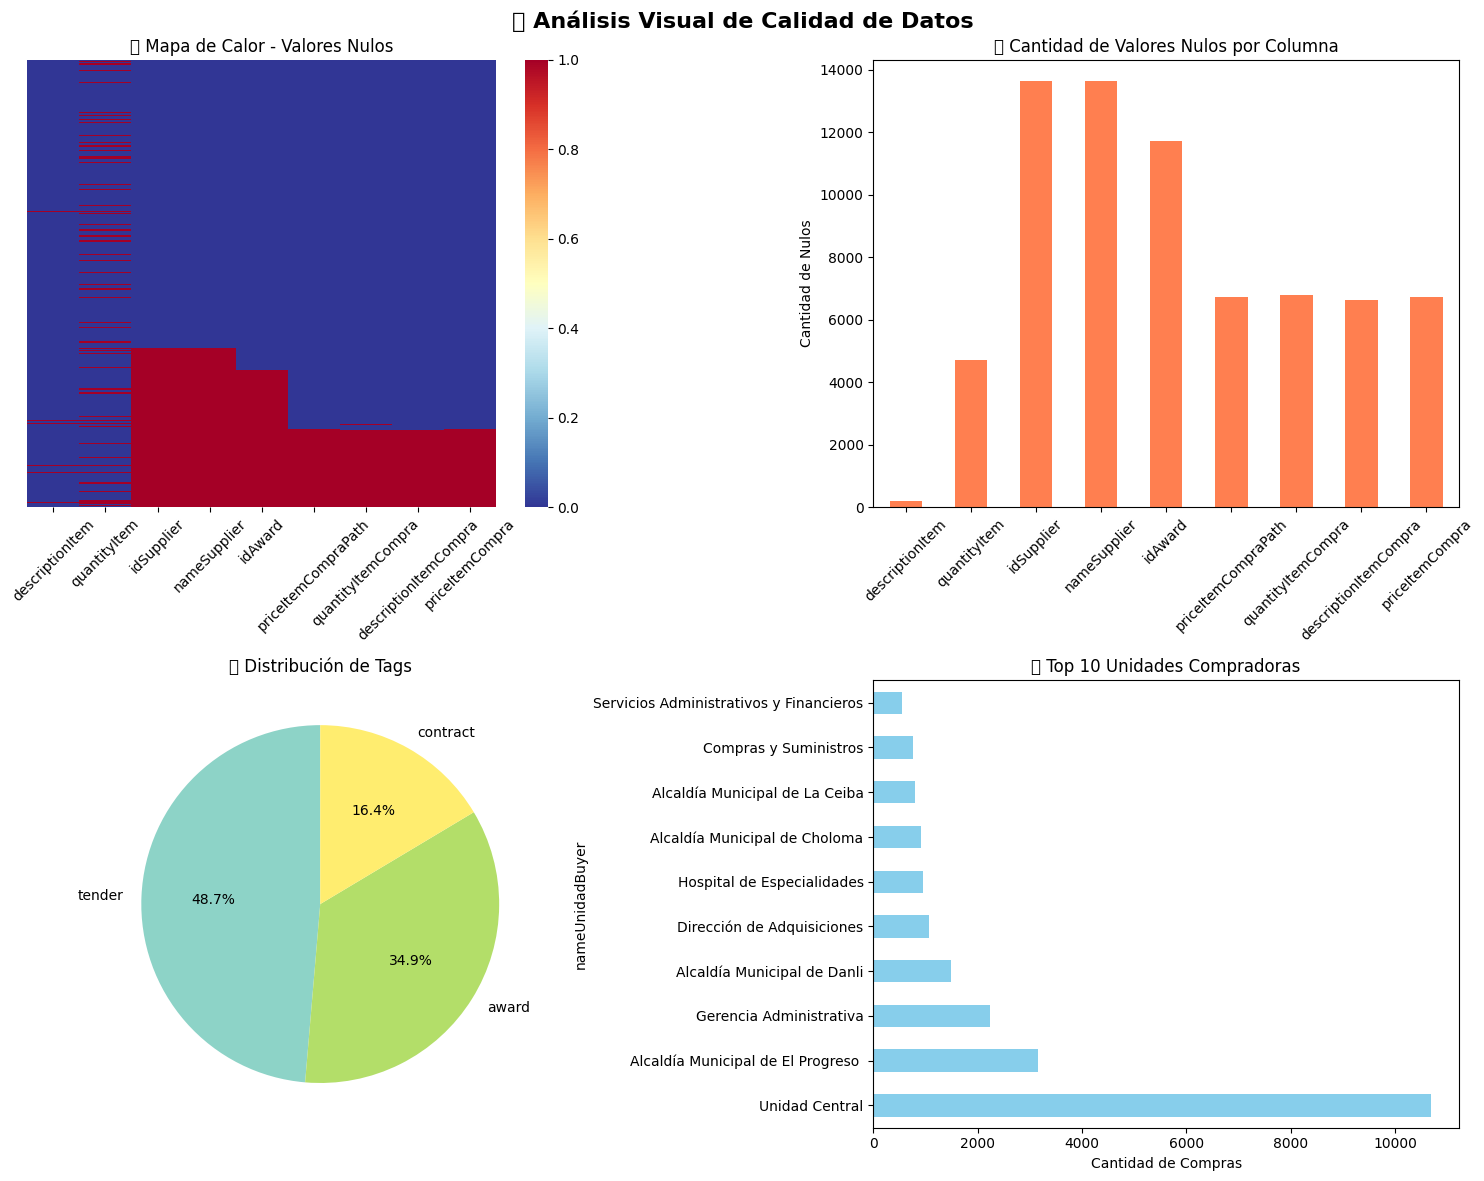

In [9]:
# Visualización 1: Distribución de valores nulos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Análisis Visual de Calidad de Datos', fontsize=16, fontweight='bold')

# 1. Mapa de calor de valores nulos
ax1 = axes[0, 0]
missing_matrix = df.isnull()
columns_with_nulls = missing_matrix.columns[missing_matrix.sum() > 0]
if len(columns_with_nulls) > 0:
    sns.heatmap(missing_matrix[columns_with_nulls], 
                cmap='RdYlBu_r', cbar=True, ax=ax1, 
                xticklabels=True, yticklabels=False)
    ax1.set_title('🔥 Mapa de Calor - Valores Nulos')
    ax1.tick_params(axis='x', rotation=45)
else:
    ax1.text(0.5, 0.5, 'No hay valores nulos', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('🔥 Mapa de Calor - Valores Nulos')

# 2. Gráfico de barras de valores nulos
ax2 = axes[0, 1]
missing_counts = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_counts) > 0:
    missing_counts.plot(kind='bar', ax=ax2, color='coral')
    ax2.set_title('📊 Cantidad de Valores Nulos por Columna')
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_ylabel('Cantidad de Nulos')
else:
    ax2.text(0.5, 0.5, 'No hay valores nulos', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('📊 Cantidad de Valores Nulos por Columna')

# 3. Distribución de Tags
ax3 = axes[1, 0]
if 'tags' in df.columns:
    tags_counts = df['tags'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(tags_counts)))
    wedges, texts, autotexts = ax3.pie(tags_counts.values, labels=tags_counts.index, 
                                       autopct='%1.1f%%', colors=colors, startangle=90)
    ax3.set_title('🏷️ Distribución de Tags')
else:
    ax3.text(0.5, 0.5, 'Columna tags no encontrada', ha='center', va='center', transform=ax3.transAxes)

# 4. Top 10 Unidades Compradoras
ax4 = axes[1, 1]
if 'nameUnidadBuyer' in df.columns:
    top_buyers = df['nameUnidadBuyer'].value_counts().head(10)
    top_buyers.plot(kind='barh', ax=ax4, color='skyblue')
    ax4.set_title('🏢 Top 10 Unidades Compradoras')
    ax4.set_xlabel('Cantidad de Compras')
else:
    ax4.text(0.5, 0.5, 'Columna nameUnidadBuyer no encontrada', ha='center', va='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

📊 Variables numéricas encontradas: ['quantityItem', 'idClassification', 'quantityItemCompra', 'priceItemCompra']


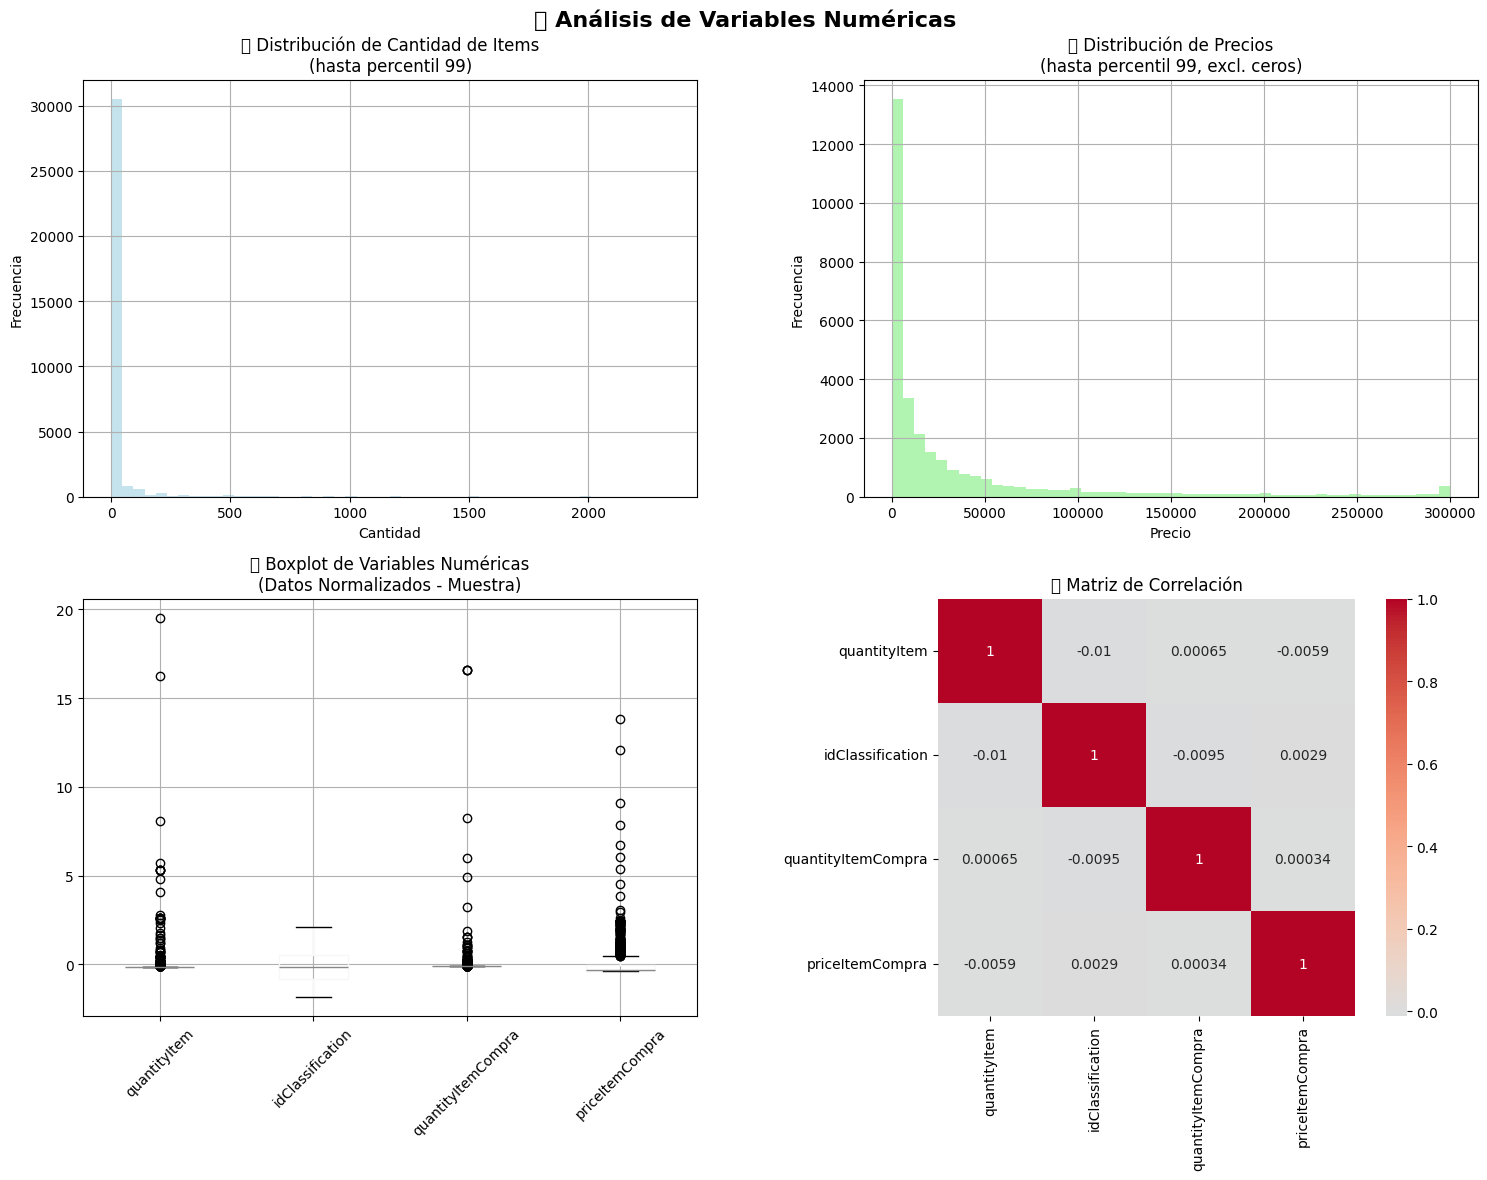

In [10]:
# Visualización 2: Análisis de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"📊 Variables numéricas encontradas: {list(numeric_columns)}")

if len(numeric_columns) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('📈 Análisis de Variables Numéricas', fontsize=16, fontweight='bold')
    
    # 1. Distribución de quantityItem
    ax1 = axes[0, 0]
    if 'quantityItem' in df.columns:
        # Filtrar outliers extremos para mejor visualización
        q99 = df['quantityItem'].quantile(0.99)
        filtered_qty = df['quantityItem'][df['quantityItem'] <= q99]
        filtered_qty.hist(bins=50, ax=ax1, color='lightblue', alpha=0.7)
        ax1.set_title('📦 Distribución de Cantidad de Items\n(hasta percentil 99)')
        ax1.set_xlabel('Cantidad')
        ax1.set_ylabel('Frecuencia')
    
    # 2. Distribución de priceItemCompra
    ax2 = axes[0, 1]
    if 'priceItemCompra' in df.columns:
        # Filtrar outliers extremos y valores cero
        price_data = df['priceItemCompra'].dropna()
        price_data = price_data[price_data > 0]  # Excluir precios cero
        if len(price_data) > 0:
            q99 = price_data.quantile(0.99)
            filtered_price = price_data[price_data <= q99]
            filtered_price.hist(bins=50, ax=ax2, color='lightgreen', alpha=0.7)
            ax2.set_title('💰 Distribución de Precios\n(hasta percentil 99, excl. ceros)')
            ax2.set_xlabel('Precio')
            ax2.set_ylabel('Frecuencia')
        else:
            ax2.text(0.5, 0.5, 'No hay datos de precios válidos', ha='center', va='center', transform=ax2.transAxes)
    
    # 3. Boxplot de variables numéricas
    ax3 = axes[1, 0]
    # Seleccionar variables para boxplot (normalizadas)
    if len(numeric_columns) >= 2:
        # Tomar una muestra para mejor visualización
        sample_data = df[numeric_columns].dropna().sample(n=min(1000, len(df)), random_state=42)
        
        # Normalizar los datos para comparación
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        normalized_data = pd.DataFrame(
            scaler.fit_transform(sample_data),
            columns=sample_data.columns
        )
        
        normalized_data.boxplot(ax=ax3)
        ax3.set_title('📊 Boxplot de Variables Numéricas\n(Datos Normalizados - Muestra)')
        ax3.tick_params(axis='x', rotation=45)
    
    # 4. Correlación entre variables numéricas
    ax4 = axes[1, 1]
    if len(numeric_columns) >= 2:
        correlation_matrix = df[numeric_columns].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   ax=ax4, square=True)
        ax4.set_title('🔥 Matriz de Correlación')
    else:
        ax4.text(0.5, 0.5, 'Insuficientes variables numéricas', ha='center', va='center', transform=ax4.transAxes)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No se encontraron variables numéricas para analizar")

📅 Análisis Temporal de las Compras:


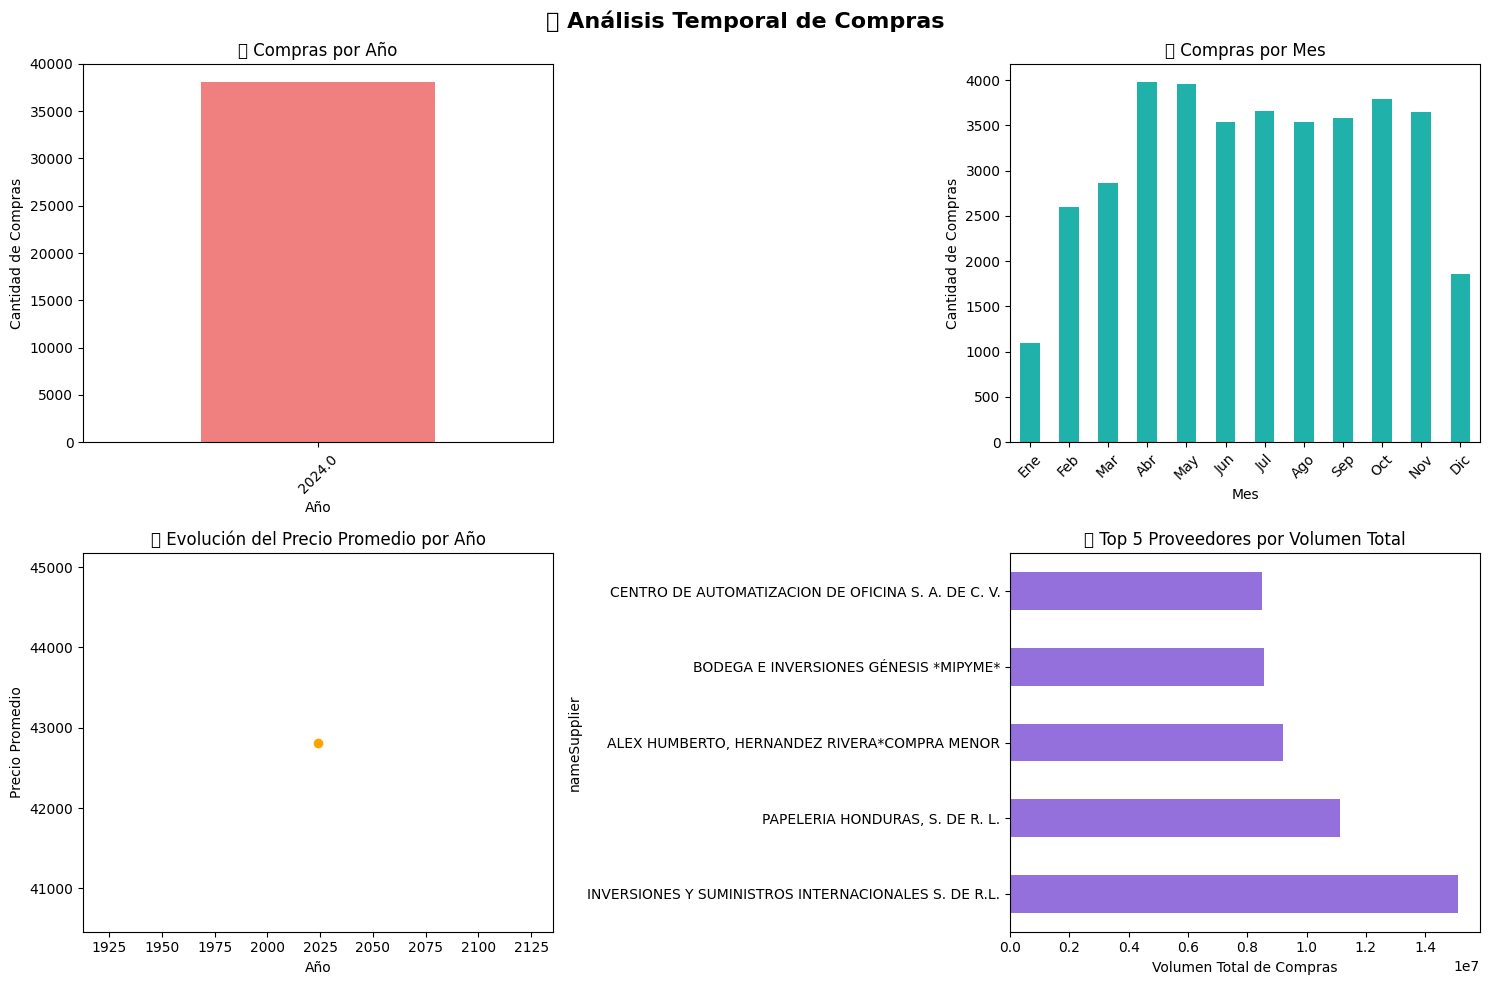

In [12]:
# Análisis temporal de las compras
print("📅 Análisis Temporal de las Compras:")
print("=" * 40)

# Verificar si existen columnas de fecha
date_columns = ['startDateTender', 'endDateTender', 'dateCompra']
existing_date_columns = [col for col in date_columns if col in df.columns]

if existing_date_columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📅 Análisis Temporal de Compras', fontsize=16, fontweight='bold')
    
    # Convertir columnas de fecha
    for col in existing_date_columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except:
            print(f"⚠️ No se pudo convertir {col} a fecha")
    
    # 1. Distribución por años (usando dateCompra si existe)
    ax1 = axes[0, 0]
    if 'dateCompra' in df.columns:
        df['year'] = df['dateCompra'].dt.year
        yearly_counts = df['year'].value_counts().sort_index()
        yearly_counts.plot(kind='bar', ax=ax1, color='lightcoral')
        ax1.set_title('📊 Compras por Año')
        ax1.set_xlabel('Año')
        ax1.set_ylabel('Cantidad de Compras')
        ax1.tick_params(axis='x', rotation=45)
    else:
        ax1.text(0.5, 0.5, 'No hay datos de fecha de compra', ha='center', va='center', transform=ax1.transAxes)
    
    # 2. Distribución por meses
    ax2 = axes[0, 1]
    if 'dateCompra' in df.columns:
        df['month'] = df['dateCompra'].dt.month
        monthly_counts = df['month'].dropna().value_counts().sort_index()
        month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                      'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
        # Crear un diccionario para mapear meses
        month_mapping = {i+1: month_names[i] for i in range(12)}
        monthly_counts.index = [month_mapping.get(int(i), f'Mes {int(i)}') for i in monthly_counts.index if not pd.isna(i)]
        monthly_counts.plot(kind='bar', ax=ax2, color='lightseagreen')
        ax2.set_title('📊 Compras por Mes')
        ax2.set_xlabel('Mes')
        ax2.set_ylabel('Cantidad de Compras')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'No hay datos de fecha de compra', ha='center', va='center', transform=ax2.transAxes)
    
    # 3. Evolución temporal de precios promedio
    ax3 = axes[1, 0]
    if 'dateCompra' in df.columns and 'priceItemCompra' in df.columns:
        # Agrupar por año y calcular precio promedio
        price_by_year = df.groupby('year')['priceItemCompra'].mean()
        price_by_year.plot(kind='line', ax=ax3, color='orange', marker='o')
        ax3.set_title('💰 Evolución del Precio Promedio por Año')
        ax3.set_xlabel('Año')
        ax3.set_ylabel('Precio Promedio')
    else:
        ax3.text(0.5, 0.5, 'No hay datos suficientes para análisis temporal de precios', 
                ha='center', va='center', transform=ax3.transAxes)
    
    # 4. Top 5 proveedores por volumen total
    ax4 = axes[1, 1]
    if 'nameSupplier' in df.columns and 'priceItemCompra' in df.columns:
        # Calcular volumen total por proveedor
        supplier_volume = df.groupby('nameSupplier')['priceItemCompra'].sum().sort_values(ascending=False).head(5)
        supplier_volume.plot(kind='barh', ax=ax4, color='mediumpurple')
        ax4.set_title('🏢 Top 5 Proveedores por Volumen Total')
        ax4.set_xlabel('Volumen Total de Compras')
    else:
        ax4.text(0.5, 0.5, 'No hay datos de proveedores o precios', 
                ha='center', va='center', transform=ax4.transAxes)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No se encontraron columnas de fecha en el dataset")

## 5. Resumen Ejecutivo y Conclusiones

### 📊 Principales Hallazgos:

#### **Estructura de los Datos:**
- **Tamaño del dataset:** 38,248 registros con 27 variables
- **Calidad general:** 93.15% de completitud promedio
- **Sin duplicados:** Los datos tienen identificadores únicos (ocidCompra, idCompra)

#### **Calidad de Datos:**
- **Variables con valores nulos significativos:**
  - idSupplier/nameSupplier: ~36% faltantes
  - idAward: ~31% faltantes  
  - Variables de compra (precio, cantidad): ~17% faltantes
  - quantityItem: ~12% faltantes

#### **Distribución de Actividad:**
- **Todos los registros** tienen status "complete"
- **Clasificación:** 100% bajo esquema UNSPSC
- **Distribución de tags:** 
  - Tender: 48.7%
  - Award: 34.9%
  - Contract: 16.4%

#### **Análisis Temporal:**
- **Concentración en 2024:** Todos los datos pertenecen al año 2024
- **Distribución mensual:** Actividad relativamente uniforme (excepto enero y diciembre con menor actividad)
- **Precio promedio estable:** ~43,000 unidades monetarias

#### **Principales Actores:**
- **Unidad Central:** Líder en volumen de compras (27.96%)
- **Top proveedores por volumen:**
  1. Inversiones y Suministros Internacionales S. DE R.L.
  2. Papelería Honduras, S. DE R.L.
  3. Alex Humberto, Hernandez Rivera*Compra Menor

In [13]:
# Resumen final con estadísticas clave
print("🎯 RESUMEN FINAL DEL EDA")
print("=" * 50)

# Estadísticas generales
print("📋 ESTADÍSTICAS GENERALES:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Variables totales: {len(df.columns)}")
print(f"   • Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   • Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")

# Calidad de datos
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n🔍 CALIDAD DE DATOS:")
print(f"   • Completitud general: {completeness:.2f}%")
print(f"   • Registros duplicados: {df.duplicated().sum()}")
print(f"   • Columnas con valores nulos: {(df.isnull().sum() > 0).sum()}")

# Información temporal
if 'dateCompra' in df.columns:
    date_range = df['dateCompra'].dropna()
    if len(date_range) > 0:
        print(f"\n📅 INFORMACIÓN TEMPORAL:")
        print(f"   • Rango de fechas: {date_range.min().date()} a {date_range.max().date()}")
        print(f"   • Años únicos: {df['year'].nunique() if 'year' in df.columns else 'N/A'}")

# Top categorías
print(f"\n🏢 PRINCIPALES ENTIDADES:")
if 'nameUnidadBuyer' in df.columns:
    top_buyer = df['nameUnidadBuyer'].value_counts().index[0]
    top_buyer_count = df['nameUnidadBuyer'].value_counts().iloc[0]
    print(f"   • Principal comprador: {top_buyer} ({top_buyer_count:,} compras)")

if 'nameSupplier' in df.columns:
    supplier_count = df['nameSupplier'].dropna().nunique()
    print(f"   • Proveedores únicos: {supplier_count:,}")

# Variables numéricas clave
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(f"\n💰 VARIABLES NUMÉRICAS CLAVE:")
    if 'priceItemCompra' in df.columns:
        price_stats = df['priceItemCompra'].dropna()
        if len(price_stats) > 0:
            print(f"   • Precio promedio: {price_stats.mean():,.2f}")
            print(f"   • Precio mediano: {price_stats.median():,.2f}")
            print(f"   • Precio máximo: {price_stats.max():,.2f}")
    
    if 'quantityItem' in df.columns:
        qty_stats = df['quantityItem'].dropna()
        if len(qty_stats) > 0:
            print(f"   • Cantidad promedio por ítem: {qty_stats.mean():.2f}")

print(f"\n✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print("=" * 50)

🎯 RESUMEN FINAL DEL EDA
📋 ESTADÍSTICAS GENERALES:
   • Total de registros: 38,248
   • Variables totales: 29
   • Variables numéricas: 6
   • Variables categóricas: 20

🔍 CALIDAD DE DATOS:
   • Completitud general: 93.58%
   • Registros duplicados: 0
   • Columnas con valores nulos: 12

📅 INFORMACIÓN TEMPORAL:
   • Rango de fechas: 2024-01-02 a 2024-12-31
   • Años únicos: 1

🏢 PRINCIPALES ENTIDADES:
   • Principal comprador: Unidad Central (10,695 compras)
   • Proveedores únicos: 3,906

💰 VARIABLES NUMÉRICAS CLAVE:
   • Precio promedio: 42,845.25
   • Precio mediano: 8,250.00
   • Precio máximo: 13,336,745.00
   • Cantidad promedio por ítem: 166.06

✅ ANÁLISIS EXPLORATORIO COMPLETADO
